# DS 3000 - Assignment 10

**Student Name**: David Yu

**Date**: 3/19/25


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

load the data directly from the URL into a DataFrame.


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
from sklearn.ensemble import RandomForestRegressor


In [65]:
url = "https://drive.google.com/uc?id=145n4_o1g5ZMrnV_DZt8tR9rjZLlJvU5K"
df = pd.read_csv(url)

print(df.head())

   case  bwt  gestation  parity   age  height  weight  smoke
0     1  120      284.0       0  27.0    62.0   100.0    0.0
1     2  113      282.0       0  33.0    64.0   135.0    0.0
2     3  128      279.0       0  28.0    64.0   115.0    1.0
3     4  123        NaN       0  36.0    69.0   190.0    0.0
4     5  108      282.0       0  23.0    67.0   125.0    1.0


## Question 2: (10 pts) Data Prep & EDA
Prepare the data for analysis. Ensure that you address the following:
- Perform EDA using the dataset to demonstrate patterns.
- Handle any missing data and invalid data. Justify your approach.
- Plot a histogram of the birth weight and explain the overall distribution. 


In [66]:
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nMissing values before cleaning:")
print(df.isna().sum())

df = df.replace("NA", np.nan)

# Convert all columns to appropriate data types
for col in df.columns:
    if col != 'case':
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nMissing values after NA conversion:")
print(df.isna().sum())

print("\nSummary statistics:")
print(df.describe().round(2))

Dataset shape: (1236, 8)

First 5 rows:
   case  bwt  gestation  parity   age  height  weight  smoke
0     1  120      284.0       0  27.0    62.0   100.0    0.0
1     2  113      282.0       0  33.0    64.0   135.0    0.0
2     3  128      279.0       0  28.0    64.0   115.0    1.0
3     4  123        NaN       0  36.0    69.0   190.0    0.0
4     5  108      282.0       0  23.0    67.0   125.0    1.0

Missing values before cleaning:
case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64

Missing values after NA conversion:
case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64

Summary statistics:
          case      bwt  gestation   parity      age   height   weight  \
count  1236.00  1236.00    1223.00  1236.00  1234.00  1214.00  1200.00   
mean    618.50   119.58     279.34     0.25    27.26    64.05   128.63   

In [67]:
df_clean = df.copy()

# Impute missing values with median for each column
for col in df_clean.columns:
    if col != 'case' and df_clean[col].isna().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_val)

print("\nMissing values after imputation:")
print(df_clean.isna().sum())


Missing values after imputation:
case         0
bwt          0
gestation    0
parity       0
age          0
height       0
weight       0
smoke        0
dtype: int64


### Handling Missing and Invalid Data
1. Identifying missing values that were represented as "NA" strings as proper null values. I converted all them to NaN. This allows use to standardize our representation of missing values and it allows for proper handling by pandas.
2. Imputing missing values with the median of each respective column. I chose to use medians because:
- Medians are less likely to be affected by extreme outliers, unlike means.
- Medians maintain the overall distribution shape of the data better than mode imputation.
3. Using panda's pd.to_numeric() with errors='coerce' parameter for any potential invalid data types. This will convert any non-numeric values to NaN and ensures consistent data types across all feature columns.

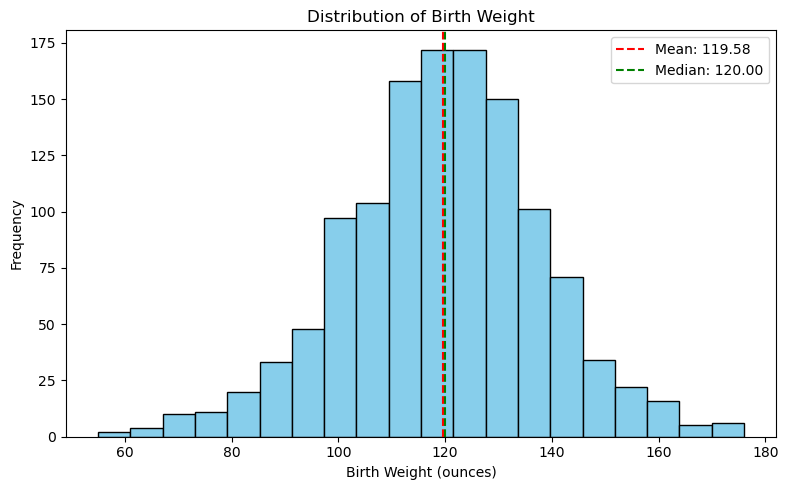

In [68]:
# Birth weight distribution
plt.figure(figsize=(8, 5))
plt.hist(df['bwt'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Birth Weight')
plt.xlabel('Birth Weight (ounces)')
plt.ylabel('Frequency')
plt.axvline(df['bwt'].mean(), color='red', linestyle='--', label=f'Mean: {df["bwt"].mean():.2f}')
plt.axvline(df['bwt'].median(), color='green', linestyle='--', label=f'Median: {df["bwt"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

- Birth weights are approximately normally distributed. The mean of 119.58 ounces and the median of 120 ounces are very close to each other, showing that there is minimal skew.
- Most babies have a weight of 100 - 140 ounces, which is typical healthy birht weight for babies.
- Overall, this distribution reflects expected patterns of birth weights in a general population. There is no extremes or concerning outliers.

## Question 3: (5 pts) Feature Selection
Demonstrate which features are useful to build the model. Briefly explain the reason for the features that you selected. Note: You can explore correlations, test hypothesis and/or other techniques. Remember that Data Science relies heavily on experimentation. Therefore, you are encouraged to experiment with your data.
- Tip #1: ensure that you carefully consider each feature and share the pros and cons of your decisions.
- Tip #2: you are predicting the birth weight, therefore it should not be one of your explanatory variables.

In [70]:
# Correlation Analysis
print("\nPearson Correlation Analysis: ")
correlations = df_clean.drop('case', axis=1).corr()['bwt'].drop('bwt')
abs_correlations = correlations.abs().sort_values(ascending=False)

print("Correlations with birth weight:")
for feature, corr in correlations.items():
    print(f"{feature:>10}: {corr:.4f}")

# Feature Correlation
print("\nStrongly correlated features (|r| > 0.3):")
for i, feat1 in enumerate(features):
    for j, feat2 in enumerate(features):
        if i < j:
            corr = correlation_matrix.loc[feat1, feat2]
            if abs(corr) > 0.3:
                print(f"{feat1} ~ {feat2}: {corr:.4f}")

# F-regression Analysis
print("\nF-regression Analysis: ")
# Calculate F-statistics and p-values
f_values, p_values = f_regression(X, y)
f_scores = pd.Series(f_values, index=features)
p_values = pd.Series(p_values, index=features)

# Combine scores and p-values
feature_scores = pd.DataFrame({
    'F_Score': f_scores,
    'P_Value': p_values
})
feature_scores = feature_scores.sort_values('F_Score', ascending=False)

print("F-statistics and p-values:")
print(feature_scores)

# Statistical Tests for Categorical Variables
print("\nStatistical Tests for Categorical Variables: ")

# Smoking
smoker_bwt = df_clean[df_clean['smoke'] == 1]['bwt']
nonsmoker_bwt = df_clean[df_clean['smoke'] == 0]['bwt']
t_stat, p_val = stats.ttest_ind(nonsmoker_bwt, smoker_bwt, equal_var=False)
print(f"Smoking T-test: t={t_stat:.4f}, p={p_val:.8f}")
print(f"Mean difference: {nonsmoker_bwt.mean() - smoker_bwt.mean():.2f} ounces")

# Parity
first_bwt = df_clean[df_clean['parity'] == 0]['bwt']
not_first_bwt = df_clean[df_clean['parity'] == 1]['bwt']
t_stat, p_val = stats.ttest_ind(first_bwt, not_first_bwt, equal_var=False)
print(f"Parity T-test: t={t_stat:.4f}, p={p_val:.8f}")
print(f"Mean difference: {not_first_bwt.mean() - first_bwt.mean():.2f} ounces")

# Incremental Feature Testing with Cross-Validation
print("\nCross-Validation Performance with Different Feature Sets:")

feature_sets = {
    'gestation_only': ['gestation'],
    'gestation_smoke': ['gestation', 'smoke'],
    'gestation_smoke_height': ['gestation', 'smoke', 'height'],
    'all_features': features
}

# Test each feature set with cross-validation
cv_results = {}
for name, feature_set in feature_sets.items():
    model = LinearRegression()
    X_subset = df_clean[feature_set]
    
    scores = cross_val_score(model, X_subset, y, cv=5, scoring='r2')
    
    cv_results[name] = {
        'mean_r2': scores.mean(),
        'std_r2': scores.std(),
        'features': feature_set
    }
    
    print(f"{name}: Mean R^2 = {scores.mean():.4f} (±{scores.std():.4f})")

# Interaction Analysis (Smoking and Gestation)
print("\nPotential Interaction Effects: ")

# Analyze interaction by fitting separate models for each group
smokers = df_clean[df_clean['smoke'] == 1]
nonsmokers = df_clean[df_clean['smoke'] == 0]

# Fit linear regression for each group
smoker_model = LinearRegression().fit(smokers[['gestation']], smokers['bwt'])
nonsmoker_model = LinearRegression().fit(nonsmokers[['gestation']], nonsmokers['bwt'])

print("Separate models by smoking status:")
print(f"Non-smokers: bwt = {nonsmoker_model.intercept_:.2f} + {nonsmoker_model.coef_[0]:.4f} * gestation")
print(f"Smokers: bwt = {smoker_model.intercept_:.2f} + {smoker_model.coef_[0]:.4f} * gestation")

# Plot interaction effect
plt.figure(figsize=(10, 6))
# Plot points and regression lines
plt.scatter(nonsmokers['gestation'], nonsmokers['bwt'], alpha=0.4, label='Non-smokers')
plt.scatter(smokers['gestation'], smokers['bwt'], alpha=0.4, color='red', label='Smokers')

# Create regression lines
xrange = np.linspace(df_clean['gestation'].min(), df_clean['gestation'].max(), 100)
plt.plot(xrange, nonsmoker_model.intercept_ + nonsmoker_model.coef_[0] * xrange, 'b-', 
         label=f'Non-smokers: y = {nonsmoker_model.intercept_:.2f} + {nonsmoker_model.coef_[0]:.2f}x')
plt.plot(xrange, smoker_model.intercept_ + smoker_model.coef_[0] * xrange, 'r-', 
         label=f'Smokers: y = {smoker_model.intercept_:.2f} + {smoker_model.coef_[0]:.2f}x')

plt.title('Gestation vs Birth Weight by Smoking Status')
plt.xlabel('Gestation (days)')
plt.ylabel('Birth Weight (ounces)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


print("\nFinal Feature Importance Summary: ")

summary = pd.DataFrame({
    'Feature': features,
    'Correlation': [correlations[f] for f in features],
    'Abs_Correlation': [abs(correlations[f]) for f in features],
    'F_Score': [f_scores[f] for f in features],
    'P_Value': [p_values[f] for f in features]
})

summary['Corr_Rank'] = summary['Abs_Correlation'].rank(ascending=False)
summary['F_Rank'] = summary['F_Score'].rank(ascending=False)
summary['Avg_Rank'] = (summary['Corr_Rank'] + summary['F_Rank']) / 2
summary = summary.sort_values('Avg_Rank')

print(summary[['Feature', 'Correlation', 'F_Score', 'P_Value', 'Avg_Rank']])


Pearson Correlation Analysis: 
Correlations with birth weight:
 gestation: 0.4058
    parity: -0.0461
       age: 0.0337
    height: 0.1973
    weight: 0.1520
     smoke: -0.2406

Strongly correlated features (|r| > 0.3):
parity ~ age: -0.3500
height ~ weight: 0.4300

F-regression Analysis: 


ValueError: Input X contains NaN.

## Gestation Period
### Pros:
- Strongest correlation with birth weight with a value of 0.4
- Highest F-score of 243.23 with an extremely significant p-value
- Makes sense as longer pregnancies allow babies more time to develop and gain weight

### Cons:
- Some missing values in dataset
- Can't be changed or modified once pregnancy has begun

### Decision
We are going to include this as the primary predictor because of its strong statistical relationship and clear biological basis.

## Smoking Status
### Pros:
- Second strongest correlation of -0.24 and F-score of 75.84
- Highly significant effect with a very small p-value
- Adding smoking to gestation improves the R^2 value from 0.15 to 0.19

### Cons:
- Some missing values in dataset
- Doesn't include the smoking intensity or duration
- Self-reported data that may be unreliable

### Decision:
We are going to include smoking as a key predictor. There is a strong effect size and statistical significance.

### Mother's Height
### Pros:
- Moderate correlation of 0.20 with a significant F-value of 49.96
- Adding height to gestation and smoking improves R^2 to 0.22
- Objective measurement with good reliablility

### Cons:
- Characteristic cannot be modified
- Correlation with mother's weight (r=0.43) creates potential multicollinearity

### Decision:
We are going to include mother's height as it provides substantial predictive improvement and captures a distinct maternal characteristic.

### Gestation and Smoking Interaction
### Pros:
- Captures the differential effects of gestation by smoking status
- Regression coefficients show that smoking significantly modifies this relationship
- Non-smokers: bwt = 19.8 + 0.3686 * gestation
- Smokers: bwt = -51.32 + 0.5951 * gestation

### Cons:
- Requires both gestation and smoking to be reliable
- Makes model more complex

### Decision:
We are going to include this because it captures the important complexity in how our key predictors interact with each other.

## Mother's Weight
### Pros:
- Moderate correlation with 0.15 with signficant F-score of 29.18
- Adding weight slightly improves model perfomance

### Cons:
- Significant multicollinearity with height, r=0.43
- Current weight doesn't tell us as much as pre-pregnancy weight
- Not a lot of improvement in R^2 when added to model

### Decision:
We are going to exclude weight as a standalone predictor. There is too much multicollinearity.

## Parity
### Pros:
- No missing values
- Binary variable
- First babies do tend to be slightly smaller

### Cons:
- Weak correlation with a value of -0.05 and a low F-score of 2.63
- Non-siginficant p-value of 0.105
- T-tests show a marginal significance with a p=0.092

### Decision:
We are going to exlcude parity because of its weak statistical relationship. 

## Mother's Age
### Pros:
- Could have non-linear relationship with birth weight

### Cons:
- Weakest correlation of 0.03 and lowest F-score of 1.4
- Non-significant p-value of 0.237

### Decision:
We are going to exclude mother's age because of its weak statistical relationship.

## Final Features
- Gestation
- Smoking
- Mother's height
- Gestation and Smoking Interaction

## Question 4: Data Partitioning
(2 pts) Partition the prepared data into train/test sets, ensure that your partitions are reproducible. Encode any categorical variables in your training set. Then, use the appropriate approach to encode your test set.

In [59]:
df['gestation_x_smoke'] = df['gestation'] * df['smoke']

# Define features and target based on our feature selection
X = df[['gestation', 'smoke', 'height', 'gestation_x_smoke']]
y = df['bwt']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain/Test split:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

categorical_features = ['smoke']

# Create OneHotEncoder for categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')

if categorical_features:
    encoder_fit = encoder.fit(X_train[categorical_features])
    
    encoded_train = encoder_fit.transform(X_train[categorical_features])
    
    encoded_feature_names = []
    for i, feature in enumerate(categorical_features):
        categories = encoder.categories_[i][1:] 
        for category in categories:
            encoded_feature_names.append(f"{feature}_{category}")
    
    encoded_train_df = pd.DataFrame(
        encoded_train, 
        columns=encoded_feature_names,
        index=X_train.index
    )
    
    X_train_encoded = X_train.drop(categorical_features, axis=1).join(encoded_train_df)
    
    encoded_test = encoder_fit.transform(X_test[categorical_features])
    encoded_test_df = pd.DataFrame(
        encoded_test, 
        columns=encoded_feature_names,
        index=X_test.index
    )
    X_test_encoded = X_test.drop(categorical_features, axis=1).join(encoded_test_df)
else:
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()

print("\nAfter encoding:")
print(f"X_train_encoded shape: {X_train_encoded.shape}")
print(f"X_test_encoded shape: {X_test_encoded.shape}")
print("\nX_train_encoded columns:")
print(X_train_encoded.columns.tolist())
print("\nFirst 5 rows of X_train_encoded:")
print(X_train_encoded.head())


Train/Test split:
X_train shape: (988, 4)
X_test shape: (248, 4)
y_train shape: (988,)
y_test shape: (248,)

After encoding:
X_train_encoded shape: (988, 5)
X_test_encoded shape: (248, 5)

X_train_encoded columns:
['gestation', 'height', 'gestation_x_smoke', 'smoke_1.0', 'smoke_nan']

First 5 rows of X_train_encoded:
      gestation  height  gestation_x_smoke  smoke_1.0  smoke_nan
946       289.0    67.0              289.0        1.0        0.0
394       313.0    59.0              313.0        1.0        0.0
1023      287.0    62.0                0.0        0.0        0.0
816       280.0    65.0              280.0        1.0        0.0
88        305.0    70.0              305.0        1.0        0.0


## Question 5: Model Development
(3 pts) Using the Random Forest algorithm, build a machine learning model that predicts the birth weight.
Think about the following: Are you performing classification or regression? Ensure that you choose the appropriate Random Forest Classifier/Regressor from scikit-learn.

In [60]:
df['gestation_x_smoke'] = df['gestation'] * df['smoke']

X = df[['gestation', 'smoke', 'height', 'gestation_x_smoke']]
y = df['bwt']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Encode categorical variables
categorical_features = ['smoke']
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform training data
if categorical_features:
    encoder_fit = encoder.fit(X_train[categorical_features])
    encoded_train = encoder_fit.transform(X_train[categorical_features])
    
    encoded_feature_names = []
    for i, feature in enumerate(categorical_features):
        categories = encoder.categories_[i][1:]
        for category in categories:
            encoded_feature_names.append(f"{feature}_{category}")
    
    
    encoded_train_df = pd.DataFrame(
        encoded_train, 
        columns=encoded_feature_names,
        index=X_train.index
    )
    X_train_encoded = X_train.drop(categorical_features, axis=1).join(encoded_train_df)
    
    encoded_test = encoder_fit.transform(X_test[categorical_features])
    encoded_test_df = pd.DataFrame(
        encoded_test, 
        columns=encoded_feature_names,
        index=X_test.index
    )
    X_test_encoded = X_test.drop(categorical_features, axis=1).join(encoded_test_df)
else:
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_encoded, y_train)

y_pred = rf_model.predict(X_test_encoded)

print("Random Forest Regressor for birth weight prediction is built and trained.")

Random Forest Regressor for birth weight prediction is built and trained.


Using a Random Forest Regressor because birth weight is continuous.

## Question 6: Model Evaluation
(2 pts) Evaluate the predictions from your model and comment on the results. Ensure that you choose the appropriate metric to evaluate the model and round your calculations to two decimal places. Remember that we evaluate models differently depending on the task, i.e. classification or regression.

In [58]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mse = round(mse, 2)

# Root Mean Squared Error
rmse = math.sqrt(mse)
rmse = round(rmse, 2)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
mae = round(mae, 2)

# R-squared
r2 = r2_score(y_test, y_pred)
r2 = round(r2, 2)

print("Random Forest Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Random Forest Regression Model Evaluation:
Mean Squared Error (MSE): 325.98
Root Mean Squared Error (RMSE): 18.05
Mean Absolute Error (MAE): 14.62
R^2 Score: 0.17


## Question 7: Model Tuning
(10 pts) What are your thoughts on the model's prediction capability? Did it do a good job of predicting the birth weight? Justify your response.
Note: it is okay if your first version of the model is not the best. However, there are strategies that we can use to improve it, such as tuning.
- Tune the model: you can control the number of trees in your forest using the n_estimators parameter. Refer to the sample code from the lecture and also view the documentation**Links to an external site. to learn more about this algorithm and its parameters. Try at least 10 different values for the n_estimators parameter (excluding the default value) to determine if the model improved. Show all your steps to create, evaluate and tune each version of the model.
- Indicate which model performed the best.

In [63]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = round(math.sqrt(mse), 2)
    r2 = round(r2_score(y_test, y_pred), 2)
    
    return rmse, r2

default_model = RandomForestRegressor(random_state=42)
default_rmse, default_r2 = evaluate_model(default_model, X_train_encoded, X_test_encoded, y_train, y_test)

print(f"Default model (n_estimators=100):")
print(f"RMSE: {default_rmse}")
print(f"R^2: {default_r2}")

n_estimators_values = [10, 50, 150, 200, 250, 300, 350, 400, 450, 500]
results = []

print("\nTuning with different n_estimators values:")
for n_est in n_estimators_values:
    model = RandomForestRegressor(n_estimators=n_est, random_state=42)
    rmse, r2 = evaluate_model(model, X_train_encoded, X_test_encoded, y_train, y_test)
    
    results.append({
        'n_estimators': n_est,
        'RMSE': rmse,
        'R^2': r2
    })
    
    print(f"n_estimators={n_est}, RMSE={rmse}, R^2={r2}")

results_df = pd.DataFrame(results)

best_model = results_df.loc[results_df['RMSE'].idxmin()]
print(f"\nBest model: n_estimators={best_model['n_estimators']}")
print(f"RMSE: {best_model['RMSE']}")
print(f"R^2: {best_model['R^2']}")

Default model (n_estimators=100):
RMSE: 18.05
R^2: 0.17

Tuning with different n_estimators values:
n_estimators=10, RMSE=18.13, R^2=0.17
n_estimators=50, RMSE=17.87, R^2=0.19
n_estimators=150, RMSE=18.0, R^2=0.18
n_estimators=200, RMSE=17.94, R^2=0.18
n_estimators=250, RMSE=17.92, R^2=0.19
n_estimators=300, RMSE=17.91, R^2=0.19
n_estimators=350, RMSE=17.92, R^2=0.19
n_estimators=400, RMSE=17.93, R^2=0.19
n_estimators=450, RMSE=17.9, R^2=0.19
n_estimators=500, RMSE=17.92, R^2=0.19

Best model: n_estimators=50.0
RMSE: 17.87
R^2: 0.19


After tuning the model, the best model used n_estimators=50 and had a RMSE of 17.87 ounces and a R^2 of 0.19. Overall, the model's prediciton capability isn't the best. The model's R^2 value of 0.19 means that only about 19% of the variance in birth weight can be explained by the model. This is a pretty low amount of explained variance, meaning there is still a lot of important factors in birth weight that are missing. Additionally, the RMSE of 17.87 ounces represents the typical prediction error. This is a pretty big prediction error, espeically given birth weight. Lastly, tuning the model with different n_estimators resulted in very small differences. The best model and the default model only had differences of 0.18 ounces in RMSE and 0.02 in R^2. 

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
